# Bisnis Problem Understanding

**`Context`**<br>
Customer Lifetime Value (CLV) adalah ukuran seberapa berharganya pelanggan bagi perusahaan. CLV ini cukup penting bagi perusahaan Asuransi Mobil untuk mengetahui segmentasi pelanggan untuk menargetkan pemasaran kepada pelanggan secara tepat sasaran dan untuk mengetahui bagaimana perubahan nilai pelanggan perusahaan di masa depan. Stakeholder dalam project ini adalah `Manajer Pemasaran` perusahaan asuransi mobil, yang membutuhkan nilai CLV dalam merencanakan strategi pemasaran. Dari nilai CLV perusahaan dapat menentukan berapa keuntungan yang diperoleh dari satu penumpang dan biaya yang dikeluarkan untuk memperoleh atau mempertahankan pelanggan baru.

**`Problem Statement`**<br>
Permasalahan yang dihadapi perusahaan ini adalah kurangnya akurasi dalam memprediksi CLV yang dapat menyebabkan perusahaan kehilangan pelanggan yang bernilai, atau salah dalam menargetkan upaya pemasaran dan penjualan dengan tepat. Maka departemen pemasaran membutuhkan suatu tool untuk memprediksi nilai CLV secara akurat, hal ini diperlukan karena perusahaan ingin melihat dengn cepat nilai CLV dari beberapa fitur, sehingga dapat menyingkat waktu dan biaya yang dibutuhkan sangat sedikit.

**`Goals`**<br>
Tujuan dari proyek ini adalah untuk mengembangkan model prediksi CLV yang akurat berdasarkan dataset yang tersedia. Model prediksi ini diharapkan dapat membantu perusahaan untuk menaikkan penjualan dengan menganalisis melalui CLV tiap pelanggan.

**`Analytic Approach`**<br>
Pada proyek ini, analytic approach yang digunakan adalah regresi. Regresi merupakan metode statistik yang digunakan untuk memprediksi nilai variabel dependen berdasarkan nilai variabel independen. Dalam kasus ini, variabel dependennya adalah 'Customer Lifetime Value', sedangkan variabel independen adalah 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education', 'Number of Policies','Monthly Premium Auto', 'Total Claim Amount', dan 'Income

**`Metric Evaluation`**<br>
Evaluation metrics yang digunakan adalah Root Mean Squared Error (RMSE). RMSE merupakan metric yang mengukur seberapa jauh rata-rata prediksi menyimpang dari nilai aktual. RMSE yang rendah menunjukkan bahwa model prediksi memiliki akurasi yang tinggi. Alasan memilih adalah RMSE mudah untuk diinterpretasikan karena memiliki satuan yang sama dengan variabel yang diukur sehingga mempermudah untuk memahami sejauh mana model memiliki kesalahan dalam memprediksi nilai CLV.

___

# Data Understanding

Dataset merupakan data yang diambil dari sebuah perusahaan asuransi mobil. Setiap baris data merepresentasikan informasi terkait sebuah asuransi yang dibeli.

**`Penjelasan Kolom`**
1. **Vehicle Class:** Kolom ini menunjukkan kelas kendaraan yang diasuransikan oleh pelanggan. Kelas kendaraan dapat mencakup berbagai jenis kendaraan, seperti Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car.

2. **Coverage:** Kolom ini menunjukkan jenis perlindungan asuransi yang dimiliki oleh pelanggan. Jenis perlindungan dapat mencakup asuransi Basic, Extended, Premium.

3. **Renew Offer Type:** Kolom ini menunjukkan jenis tawaran perpanjangan asuransi yang diterima oleh pelanggan.

4. **EmploymentStatus:** Kolom ini menunjukkan status pekerjaan pelanggan. Status pekerjaan dapat mencakup Retired, Employed, Disabled, Medical Leave, Unemployed

5. **Marital Status:** Kolom ini menunjukkan status perkawinan pelanggan. Status perkawinan dapat mencakup Divorced, Married, Single.

6. **Education:** Kolom ini menunjukkan tingkat pendidikan pelanggan. Tingkat pendidikan dapat mencakup High School or Below, College, Master, Bachelor, Doctor.

7. **Number of Policies:** Kolom ini menunjukkan jumlah polis asuransi yang dimiliki oleh pelanggan. Pelanggan dapat memiliki beberapa polis asuransi untuk berbagai aset atau jenis perlindungan.

8. **Monthly Premium Auto:** Kolom ini menunjukkan premi asuransi bulanan untuk kendaraan pelanggan.

9. **Total Claim Amount:** Kolom ini menunjukkan jumlah total klaim asuransi yang pernah diajukan oleh pelanggan. 

10. **Income:** Kolom ini menunjukkan pendapatan tahunan pelanggan.

11. **Customer Lifetime Value (CLV):** Kolom ini menunjukkan nilai pelanggan seumur hidup bagi perusahaan asuransi. 

**Import Library yang dibutuhkan**

In [134]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [135]:
# Import dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [136]:
# Cek jumlah baris dan kolom
df.shape

(5669, 11)

In [137]:
# Cek informasi dan tipe kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


### Nilai Unik setiap kolom

In [138]:
# Menampilkan jumlah nilai unik, nilai unik dan tipe data dari semua kolom

pd.set_option('display.max_colwidth', None)

uniqueItem = []
for column in df.columns:
    uniqueItem.append([column, df[column].nunique(), df[column].unique(), df[column].dtype])

unique = pd.DataFrame(columns=['Column', 'Unique Count', 'Unique Value', 'Data Type'], data=uniqueItem)
unique

,Column,Unique Count,Unique Value,Data Type
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]",object
1,Coverage,3,"[Extended, Basic, Premium]",object
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]",object
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]",object
4,Marital Status,3,"[Divorced, Married, Single]",object
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]",object
6,Number of Policies,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]",float64
7,Monthly Premium Auto,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]",float64
8,Total Claim Amount,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]",float64
9,Income,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]",float64


* **Data Numerik**
1. Discrete: Number of Policies, 
2. Continue: Monthly Premium Auto, Total Claim Amount, Income, Customer Lifetime Value

* **Data Kategorik** 
1. Ordinal : Education
2. Nominal : Vehicle Class, Coverage, Renew Offer Type, EmploymentStatus, Marital Status

___

# Exploratory Data Analysis

### Melihat sebaran data pada kolom `Customer Lifetime Value`

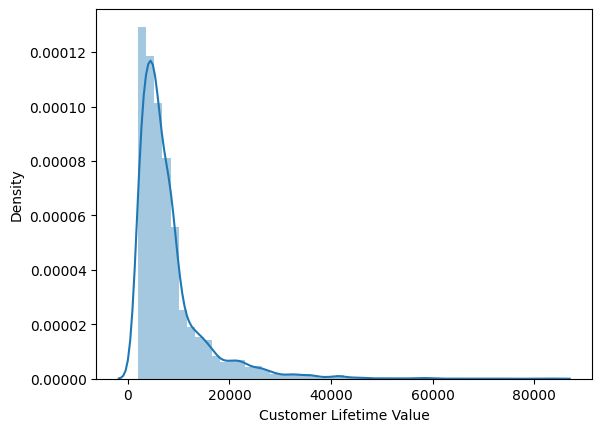

In [139]:
sns.distplot(df['Customer Lifetime Value'], kde=True);

In [140]:
df['Customer Lifetime Value'].describe()

count     5669.000000
mean      8029.874592
std       6916.708246
min       1898.007675
25%       3954.344534
50%       5800.188903
75%       9031.214859
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Jaraka antara Q3 ke max memiliki rentang yang sangat jauh, hal ini bisa dilihat juga dari visualisasi bahwa data ini memiliki distribusi Right-Skewed

### Mengecek median CLV tertinggi pada masing-masing kolom kategori

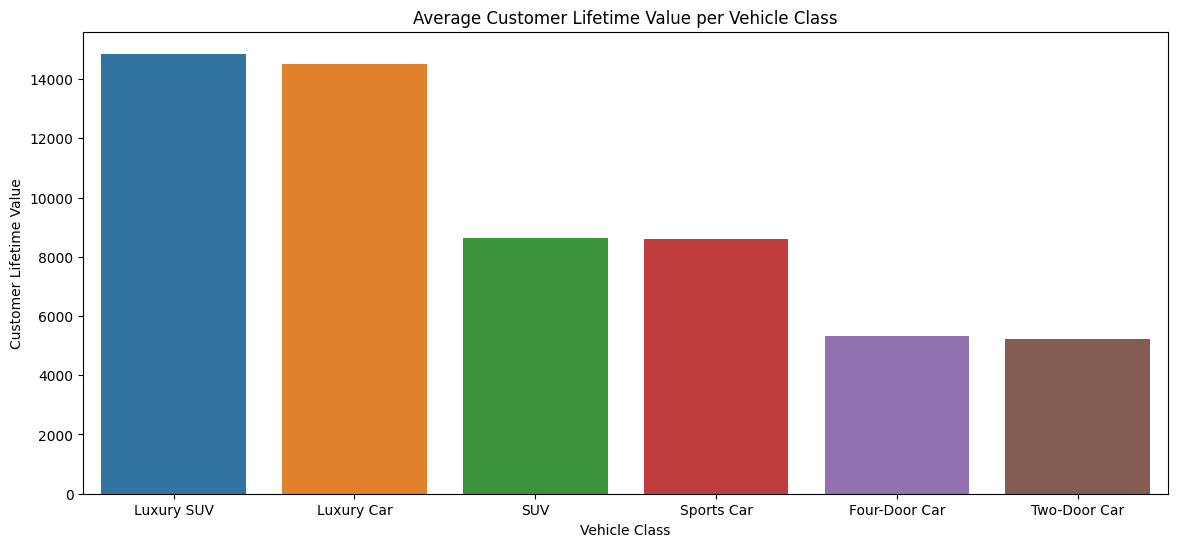

Median CLV di Luxury SUV adalah : 14854.19552
Median CLV di Luxury Car adalah : 14510.7505
Median CLV di SUV adalah : 8628.816326
Median CLV di Sports Car adalah : 8608.157233
Median CLV di Four-Door Car adalah : 5319.4888995
Median CLV di Two-Door Car adalah : 5211.7114685


In [141]:
# Median CLV disetiap vehicle class
med_clv_in_VC = df.groupby('Vehicle Class')['Customer Lifetime Value'].median().reset_index().sort_values(by='Customer Lifetime Value', ascending=False)
med_clv_in_VC

# Membuat grafik
plt.figure(figsize=(14, 6))
sns.barplot(data= med_clv_in_VC, x='Vehicle Class', y='Customer Lifetime Value', hue="Vehicle Class")
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.title('Average Customer Lifetime Value per Vehicle Class')
plt.show()

# Menunjukkan Jumlah Data
for index, row in med_clv_in_VC.iterrows():
    print(f"Median CLV di {row['Vehicle Class']} adalah : {row['Customer Lifetime Value']}")

- Median CLV tertinggi pada kolom Vehicle Class adalah Luxury SUV (14854.19552). Maka bisa kita asumsikan diawal bahwa nilai CLV tinggi disebabkan oleh vehicle class nya adalah Luxury SUV.

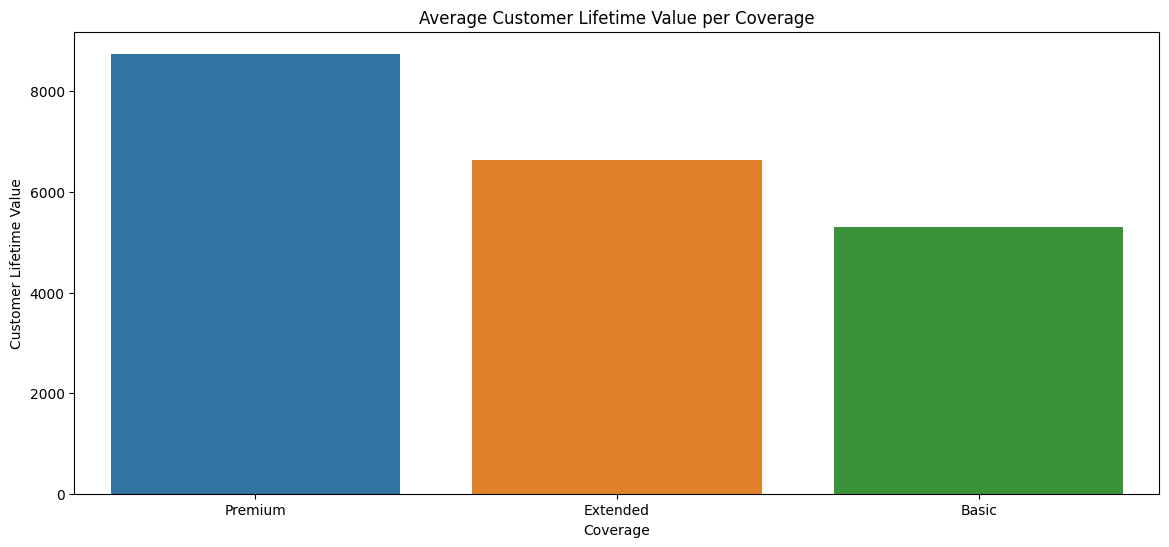

Median CLV di Premium adalah : 8746.674490000001
Median CLV di Extended adalah : 6637.044009499999
Median CLV di Basic adalah : 5297.151805


In [142]:
# Median CLV disetiap Coverage
med_clv_in_VC = df.groupby('Coverage')['Customer Lifetime Value'].median().reset_index().sort_values(by='Customer Lifetime Value', ascending=False)
med_clv_in_VC
# Membuat grafik
plt.figure(figsize=(14, 6))
sns.barplot(data= med_clv_in_VC, x='Coverage', y='Customer Lifetime Value', hue="Coverage")
plt.xlabel('Coverage')
plt.ylabel('Customer Lifetime Value')
plt.title('Average Customer Lifetime Value per Coverage')
plt.show()

# Menunjukkan Jumlah Data
for index, row in med_clv_in_VC.iterrows():
    print(f"Median CLV di {row['Coverage']} adalah : {row['Customer Lifetime Value']}")

- Median CLV tertinggi pada kolom Coverage adalah Premium (8746.674490000001). Maka bisa kita asumsikan diawal bahwa nilai CLV tinggi disebabkan oleh Coverage nya adalah Premium.

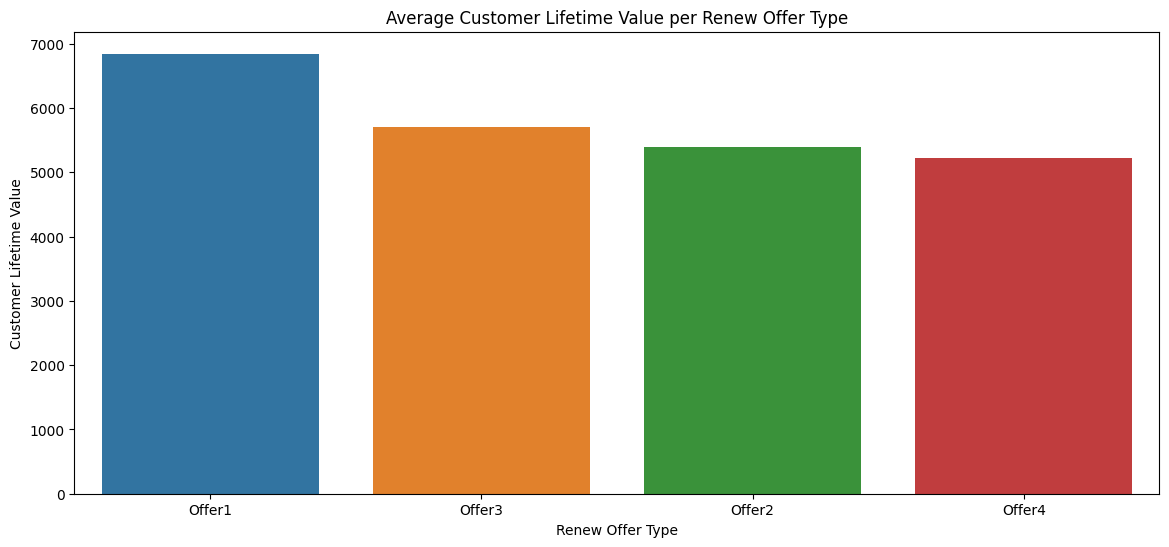

Median CLV di Offer1 adalah : 6846.150323
Median CLV di Offer3 adalah : 5708.0903825000005
Median CLV di Offer2 adalah : 5389.499465
Median CLV di Offer4 adalah : 5222.656199


In [143]:
# Median CLV disetiap Renew Offer Type
med_clv_in_VC = df.groupby('Renew Offer Type')['Customer Lifetime Value'].median().reset_index().sort_values(by='Customer Lifetime Value', ascending=False)
med_clv_in_VC
# Membuat grafik
plt.figure(figsize=(14, 6))
sns.barplot(data= med_clv_in_VC, x='Renew Offer Type', y='Customer Lifetime Value', hue="Renew Offer Type")
plt.xlabel('Renew Offer Type')
plt.ylabel('Customer Lifetime Value')
plt.title('Average Customer Lifetime Value per Renew Offer Type')
plt.show()

# Menunjukkan Jumlah Data
for index, row in med_clv_in_VC.iterrows():
    print(f"Median CLV di {row['Renew Offer Type']} adalah : {row['Customer Lifetime Value']}")

- Median CLV tertinggi pada kolom Renew Offer Type adalah Offer1 (6846.150323). Maka bisa kita asumsikan diawal bahwa nilai CLV tinggi disebabkan oleh Renew Offer Type nya adalah Offer1.

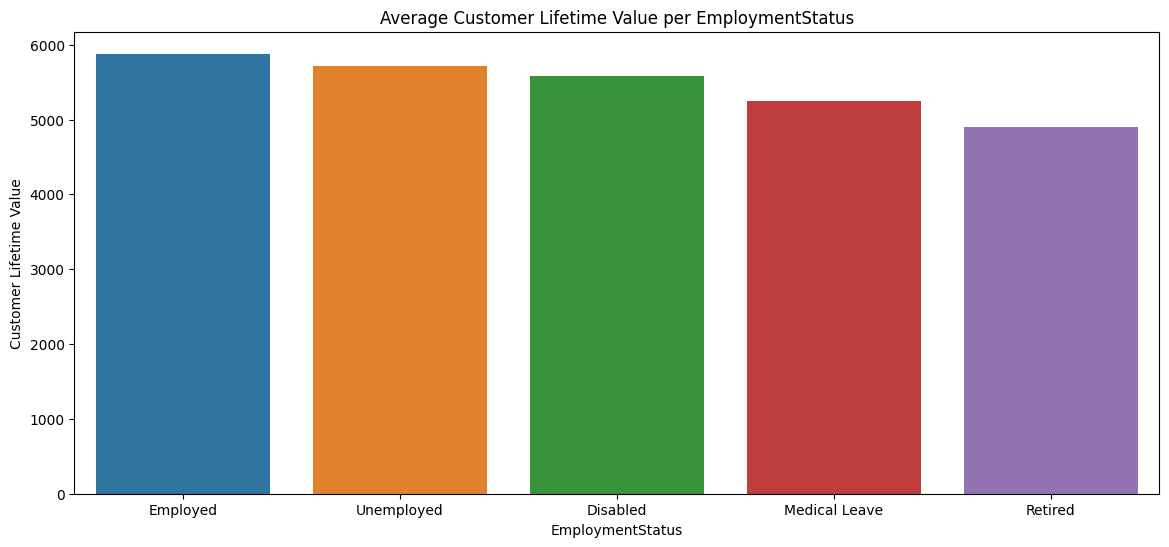

Median CLV di Employed adalah : 5879.176092
Median CLV di Unemployed adalah : 5714.246379
Median CLV di Disabled adalah : 5585.9635315
Median CLV di Medical Leave adalah : 5253.487908
Median CLV di Retired adalah : 4904.894731


In [144]:
# Median CLV disetiap EmploymentStatus
med_clv_in_VC = df.groupby('EmploymentStatus')['Customer Lifetime Value'].median().reset_index().sort_values(by='Customer Lifetime Value', ascending=False)
med_clv_in_VC
# Membuat grafik
plt.figure(figsize=(14, 6))
sns.barplot(data= med_clv_in_VC, x='EmploymentStatus', y='Customer Lifetime Value', hue="EmploymentStatus")
plt.xlabel('EmploymentStatus')
plt.ylabel('Customer Lifetime Value')
plt.title('Average Customer Lifetime Value per EmploymentStatus')
plt.show()

# Menunjukkan Jumlah Data
for index, row in med_clv_in_VC.iterrows():
    print(f"Median CLV di {row['EmploymentStatus']} adalah : {row['Customer Lifetime Value']}")

- Median CLV tertinggi pada kolom EmploymentStatus adalah Employed (5879.176092). Maka bisa kita asumsikan diawal bahwa nilai CLV tinggi disebabkan oleh EmploymentStatus nya adalah Employed.

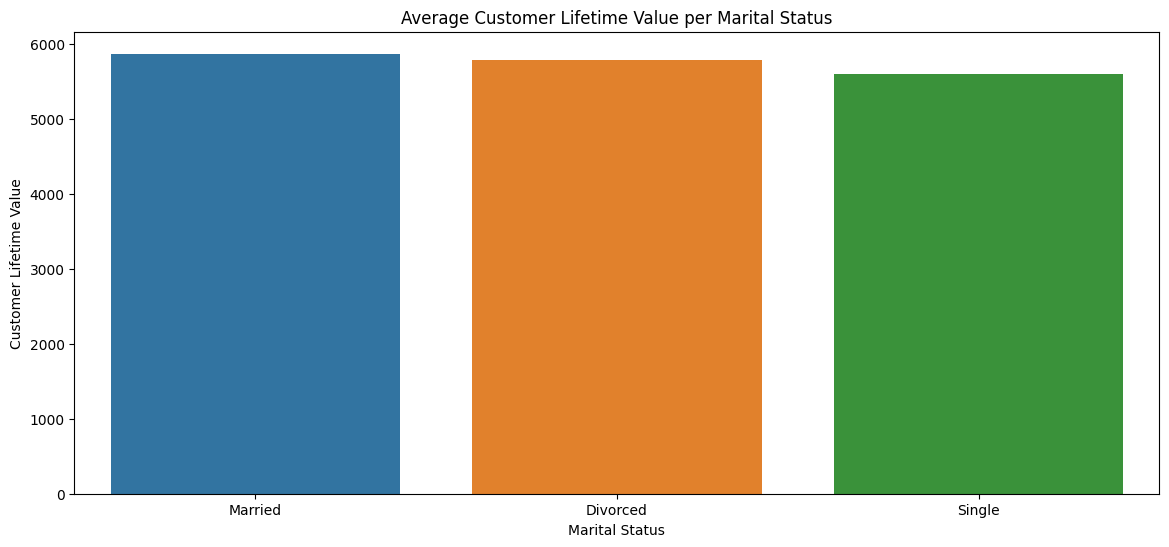

Median CLV di Married adalah : 5866.068903
Median CLV di Divorced adalah : 5788.639955000001
Median CLV di Single adalah : 5595.389905


In [145]:
# Median CLV disetiap Marital Status
med_clv_in_VC = df.groupby('Marital Status')['Customer Lifetime Value'].median().reset_index().sort_values(by='Customer Lifetime Value', ascending=False)
med_clv_in_VC
# Membuat grafik
plt.figure(figsize=(14, 6))
sns.barplot(data= med_clv_in_VC, x='Marital Status', y='Customer Lifetime Value', hue="Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Customer Lifetime Value')
plt.title('Average Customer Lifetime Value per Marital Status')
plt.show()

# Menunjukkan Jumlah Data
for index, row in med_clv_in_VC.iterrows():
    print(f"Median CLV di {row['Marital Status']} adalah : {row['Customer Lifetime Value']}")

- Median CLV tertinggi pada kolom Marital Status adalah Married (5866.068903). Maka bisa kita asumsikan diawal bahwa nilai CLV tinggi disebabkan oleh Marital Status nya adalah Married.

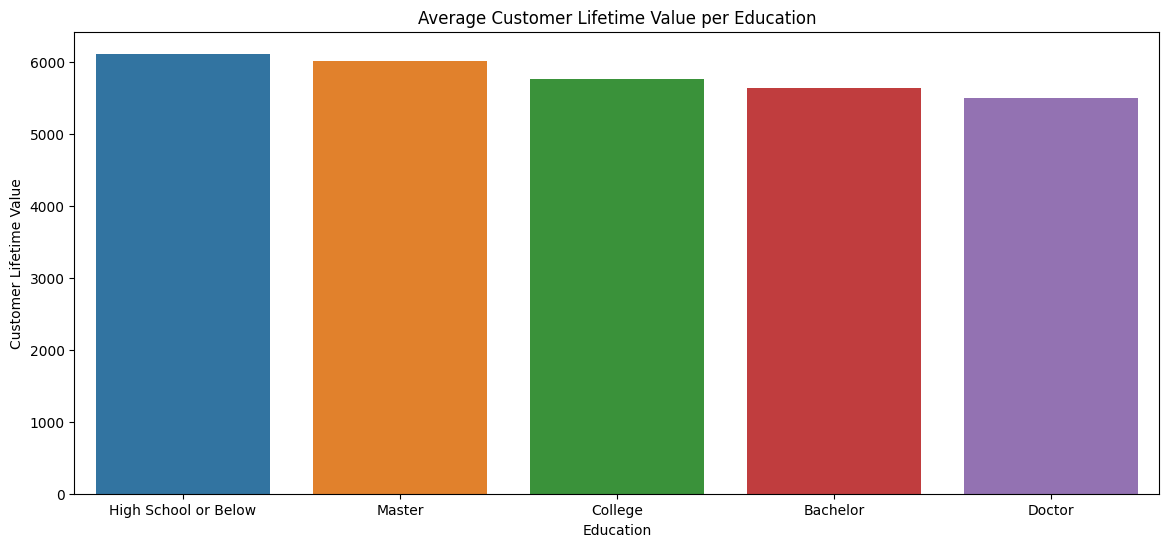

Median CLV di High School or Below adalah : 6109.359532500001
Median CLV di Master adalah : 6007.764745
Median CLV di College adalah : 5756.514382
Median CLV di Bachelor adalah : 5638.150224
Median CLV di Doctor adalah : 5494.192881


In [146]:
# Median CLV disetiap Education
med_clv_in_VC = df.groupby('Education')['Customer Lifetime Value'].median().reset_index().sort_values(by='Customer Lifetime Value', ascending=False)
med_clv_in_VC
# Membuat grafik
plt.figure(figsize=(14, 6))
sns.barplot(data= med_clv_in_VC, x='Education', y='Customer Lifetime Value', hue="Education")
plt.xlabel('Education')
plt.ylabel('Customer Lifetime Value')
plt.title('Average Customer Lifetime Value per Education')
plt.show()

# Menunjukkan Jumlah Data
for index, row in med_clv_in_VC.iterrows():
    print(f"Median CLV di {row['Education']} adalah : {row['Customer Lifetime Value']}")

- Median CLV tertinggi pada kolom Education adalah High School or Below (6109.359532500001
). Maka bisa kita asumsikan diawal bahwa nilai CLV tinggi disebabkan oleh Education nya adalah High School or Below.

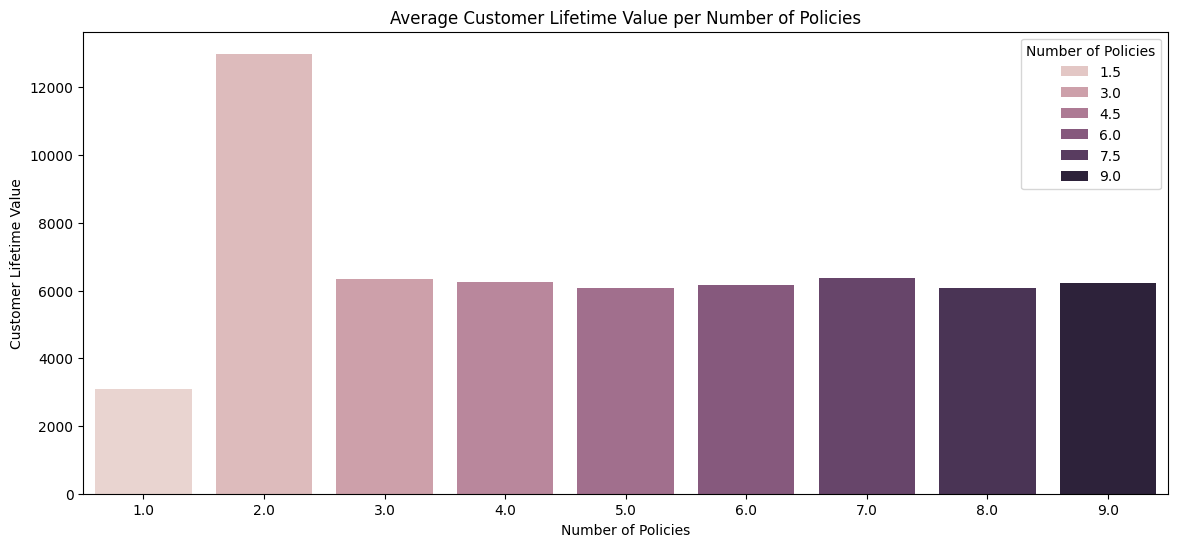

Median CLV di 2.0 adalah : 12992.27561
Median CLV di 7.0 adalah : 6382.047596
Median CLV di 3.0 adalah : 6326.679236
Median CLV di 4.0 adalah : 6265.343299
Median CLV di 9.0 adalah : 6225.781965
Median CLV di 6.0 adalah : 6163.7943665
Median CLV di 8.0 adalah : 6086.431746
Median CLV di 5.0 adalah : 6063.392804
Median CLV di 1.0 adalah : 3101.1637755


In [147]:
# Median CLV disetiap Coverage
med_clv_in_VC = df.groupby('Number of Policies')['Customer Lifetime Value'].median().reset_index().sort_values(by='Customer Lifetime Value', ascending=False)
med_clv_in_VC
# Membuat grafik
plt.figure(figsize=(14, 6))
sns.barplot(data= med_clv_in_VC, x='Number of Policies', y='Customer Lifetime Value', hue="Number of Policies")
plt.xlabel('Number of Policies')
plt.ylabel('Customer Lifetime Value')
plt.title('Average Customer Lifetime Value per Number of Policies')
plt.show()

# Menunjukkan Jumlah Data
for index, row in med_clv_in_VC.iterrows():
    print(f"Median CLV di {row['Number of Policies']} adalah : {row['Customer Lifetime Value']}")

- Median CLV tertinggi pada kolom Number of Policies adalah 2.0 (12992.27561). Maka bisa kita asumsikan diawal bahwa nilai CLV tinggi disebabkan oleh Number of Policies nya adalah 2.0.

### Korelasi tiap kolom numerik

<Axes: >

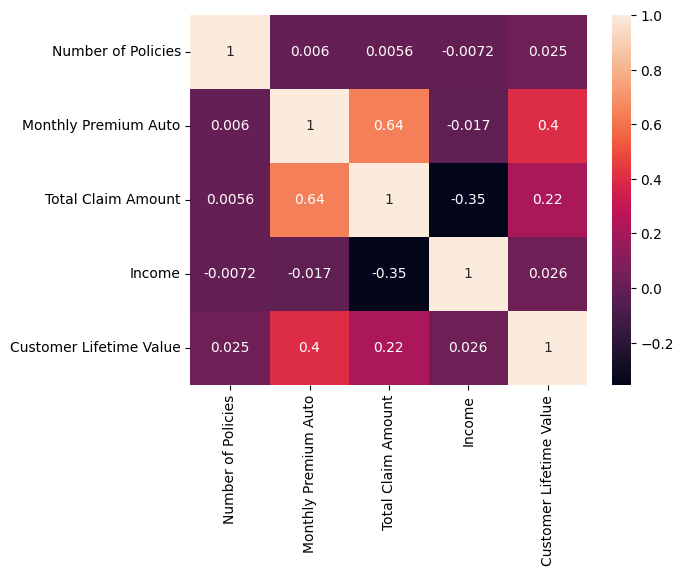

In [148]:
# Menampilkan heatmap dari korelasi
sns.heatmap(df.corr(numeric_only=True), annot=True)

Analisis : <br>
* **Nilai korelasi antara Customer Lifetime Value dengan Number of Policies adalah 0.022** Hal ini menunjukkan bahwa terdapat korelasi yang sangat lemah antara Customer Lifetime Value dengan Number of Policies. Artinya, jumlah polis yang dimiliki oleh pelanggan tidak terlalu berpengaruh terhadap Customer Lifetime Value.

* **Nilai korelasi antara Customer Lifetime Value dengan Monthly Premium Auto adalah 0.42** Hal ini menunjukkan bahwa terdapat korelasi yang sedang antara Customer Lifetime Value dengan Monthly Premium Auto. Artinya, premi bulanan asuransi mobil yang dibayarkan oleh pelanggan memiliki pengaruh yang sedang terhadap Customer Lifetime Value.

* **Nilai korelasi antara Customer Lifetime Value dengan Total Claim Amount adalah 0.21** Hal ini menunjukkan bahwa terdapat korelasi yang lemah antara Customer Lifetime Value dengan Total Claim Amount. Artinya, jumlah klaim yang diajukan oleh pelanggan tidak terlalu berpengaruh terhadap Customer Lifetime Value.

* **Nilai korelasi antara Customer Lifetime Value dengan Income adalah 0.037** Hal ini menunjukkan bahwa terdapat korelasi yang sangat lemah antara Customer Lifetime Value dengan Income. Artinya, pendapatan pelanggan tidak terlalu berpengaruh terhadap Customer Lifetime Value.

Dapat disimpulkan bahwa faktor yang paling berpengaruh terhadap Customer Lifetime Value adalah Monthly Premium Auto. Faktor-faktor lain, seperti Number of Policies, Total Claim Amount, dan Income, memiliki pengaruh yang lebih kecil.

___

# Preprocessing

In [149]:
# Melakukan duplikasi Dataframe untuk keperluan preprocessing dan feature engineering
df_model = df.copy()

In [150]:
df_model.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


### Missing Value

In [151]:
# Cek Missing Value
df_model.isna().sum().sum()

0

Pada data ini tidak terdapat missing value, maka tidak dilakukan handling missing value

### Data Duplikat

In [152]:
# Cek data duplikat
df_model.duplicated().sum()

618

In [153]:
df_model.shape

(5669, 11)

Terdapat 618 data duplikat, kita bisa melakukan drop karena hanya memiliki proporsi sebesar 1%

In [20]:
df_model = df_model.drop_duplicates()

### Statistik Deskriptif

In [21]:
# Cek statistik deskriptif kolom numerik
df_model.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [22]:
# Cek statistik deskriptif kolom kategorik
df_model.describe(include='O')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5051,5051,5051,5051,5051,5051
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3100,2019,3187,2986,1529


### Handling Outlier Masing2 Kolom Numerik

In [23]:
# Membuat Fungsi untuk melihat outlier
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    outliers = data[(data < lower_limit) | (data > upper_limit)]
    print("Batas Bawah :", lower_limit)
    print("Batas Atas :", upper_limit)
    print("Jumlah Outlier:", len(outliers))

In [24]:
print(f"Kolom numerik :{list(df.select_dtypes('number').columns)}")

Kolom numerik :['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']


#### Number of Policies

In [25]:
outlier(df_model['Number of Policies'])

Batas Bawah : -3.5
Batas Atas : 8.5
Jumlah Outlier: 228


Terlihat bahwa terdapat 264 data diluar batas perhitungan IQR dengan Number of Policies 9, hal ini tidak menjadi masalah dan kita masih menginginkan model untuk memprediksi Number of Policies 9. maka tidak dilakukan apapun pada outlier ini agar Model yang dibuat dapat tetap bisa memprediksi Number of Policies 9. 

#### Monthly Premium Auto

In [26]:
outlier(df_model['Monthly Premium Auto'])

Batas Bawah : 6.5
Batas Atas : 170.5
Jumlah Outlier: 252


Terlihat bahwa terdapat 275 data diluar batas perhitungan IQR dengan nilai diatas 170.5, hal ini tidak menjadi masalah dan kita masih menginginkan model untuk memprediksinya. maka tidak dilakukan apapun pada outlier ini agar Model yang dibuat dapat tetap bisa memprediksi seluruh data Mothly Premium Auto

#### Total Claim Amount

In [27]:
outlier(df_model['Total Claim Amount'])

Batas Bawah : -192.74392225000005
Batas Atas : 992.6433477500001
Jumlah Outlier: 217


Terlihat bahwa terdapat 217 data yang diluar batas atas IQR, kita akan menghapus outlier ini dan hal ini akan menjadi keterbatasan model. Jadi model yang memprediksi Total Claim Amount di atas $992.64 akan menjadi kurang akurat.

In [28]:
df_model = df_model[df_model['Total Claim Amount'] <= 992.6433477500001]

#### Income

In [29]:
outlier(df_model['Income'])

Batas Bawah : -69221.0
Batas Atas : 142793.0
Jumlah Outlier: 0


Terlihat bahwa tidak terdapat data diluar batas perhitungan IQR. Maka tidak ada handling oulier dan model dapat tetap bisa memprediksi seluruh data Income.

#### Customer Lifetime Value

In [30]:
outlier(df_model['Customer Lifetime Value'])

Batas Bawah : -3452.0803875000006
Batas Atas : 16002.102948500002
Jumlah Outlier: 426


Terlihat bahwa terdapat 493 data yang diatas $16609.77 atau sekitar 8,6% dalam kolom Customer Lifetime Value. Pada model ini akan dilakukan drop dengan tujuan agar model lebih stabil dan memiliki akurasi tinggi. Outlier dapat menyebabkan model menjadi tidak stabil dan sensitif terhadap terhadap data. Dengan menghapus outlier, kita dapat meningkatkan stabilitas model, membuatnya lebih dapat diandalkan dalam situasi yang berbeda.

In [31]:
df_model = df_model[(df_model['Customer Lifetime Value'] <= 16609)]

___

# Modeling

Memisahkan antara data train dengan data test menggunakan train_test_split dengan tujuan agar model belajar dari 80% data, dan 20% data digunakan untuk menguji hasil prediksi mesin. Pemilihan test size sebesar 20% dikarenakan data berjumlah relatif sedikit (5051 baris) maka data train perlu diberikan porsi yang cukup besar agar proses training optimal.

In [32]:
# Membagi data menjadi 2, yaitu Feature dan Data Target
Feature = df_model.drop(columns='Customer Lifetime Value')
Target = df_model['Customer Lifetime Value']

# Membagi data menjadi 2, yaitu Data Train dan Data Test
X_train, X_test, y_train, y_test = train_test_split(Feature,
                                                    Target,
                                                    test_size=0.2,
                                                    random_state=48)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3552, 10)
(3552,)
(889, 10)
(889,)


Membuat Column transformer yang berisikan Encoder dan metode yang digunakan adalah One hot Encoder, OHE berfungsi untuk merepresentasikan nilai dalam variabel kategorik kedalam bentuk value numerik. Selanjutnya menerapkannya kedalam semua Data kategorik dalam X_train.

In [33]:
# Mengubah value fitur kategorikal menjadi numerikal (Encode)
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), X_train.select_dtypes('object').columns)
    ], remainder='passthrough')

# Model Benchmarking

Model Benchmarking adalah proses membandingkan kinerja berbagai model dengan tujuan untuk menentukan model dengan parameter default terbaik yang memiliki nilai RMSE terbaik.

In [34]:
# Inisialisasi Algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=48)
rf = RandomForestRegressor(random_state=48)
xgb = XGBRegressor(random_state=48)
ada = AdaBoostRegressor(random_state=48)
gbr = GradientBoostingRegressor(random_state=48)
# Membuat list berisi keseluruhan Algoritma yang digunakan
models = [lr, knn, dt, rf, xgb, ada, gbr]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=48)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', RobustScaler()),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

[-2832.2524299  -2824.37738093 -2658.47920219 -2904.18758471
 -2830.34289021] LinearRegression()
[-2897.76907215 -2769.96626028 -2622.17532219 -2856.71323643
 -2771.35732253] KNeighborsRegressor()
[-1260.58789036 -1270.2024598  -1247.15111035 -1372.34253474
 -1366.51842666] DecisionTreeRegressor(random_state=48)


[ -970.57575183  -955.76593939  -984.4647932  -1057.49091172
 -1024.61587454] RandomForestRegressor(random_state=48)
[-1055.7408487  -1029.83197597 -1027.55236166 -1089.41460605
 -1102.03713085] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=48, ...)
[-1465.27879436 -1374.72921263 -1390.98759273 -1458.05815762

In [35]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
benchmark_model = pd.DataFrame({
    'Model': ['Linear Regression',
              'KNN Regressor',
              'Decision Tree Regressor',
              'Random Forest Regressor',
              'XGBoost Regressor',
              'Ada Boost Regressor',
              'Gradient Boosting Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
}).sort_values('Mean_RMSE', ascending=False)

In [36]:
benchmark_model

,Model,Mean_RMSE,Std_RMSE
6,Gradient Boosting Regressor,-939.441501,43.839445
3,Random Forest Regressor,-998.582654,37.322602
4,XGBoost Regressor,-1060.915385,30.361980
2,Decision Tree Regressor,-1303.360484,54.471813
5,Ada Boost Regressor,-1410.772605,42.450086
1,KNN Regressor,-2783.596243,94.629605
0,Linear Regression,-2809.927898,81.173321


In [37]:
print("2 Model terbaik setelah dilakukan Model Benchmarking adalah:")
print(f"{benchmark_model.iloc[0,0]} : {benchmark_model.iloc[0,1]}")
print(f"{benchmark_model.iloc[1,0]} : {benchmark_model.iloc[1,1]}")

2 Model terbaik setelah dilakukan Model Benchmarking adalah:
Gradient Boosting Regressor : -939.4415008170275
Random Forest Regressor : -998.5826541353215


Maka tahap selanjutnya adalah melakukan prediksi pada data test menggunakan 2 model diatas untuk mengetahui score sebenarnya.

In [38]:
# Benchmark 2 model terbaik
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=48),
    'Random Forest Regressor' : RandomForestRegressor(random_state=48)
}

score_rmse = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', MinMaxScaler()),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse}, index=models.keys())
score_before_tuning

,RMSE
Gradient Boosting Regressor,862.034011
Random Forest Regressor,910.038432


Dari hasil prediksi pada data test model terbaiknya adalah `Gradient Booster Regressor`. Maka langkah selanjutnya adalah melakukan Hyperparameter pada model Gradient Booster Regressor untuk tujuan menemukan parameter terbaik dari Gradient Booster Regressor.

# Hyperparameter Tuning

Hyperparameter tuning adalah proses untuk mengoptimalkan nilai suatu model dengan menemukan kombinasi parameter yang menghasilkan score terbaik. Metode Hyperparameter Tuning bekerja dengan cara melakukan percobaan berulang-ulang dengan berbagai kombinasi parameter menggunakan Gridsearch.

Parameter yang diatur dari model Gradient Boosting Regressor ini adalah :
1. kedalaman maksimum pohon (max_depth)
2. tingkat pembelajaran (learning_rate) 
3. jumlah estimator (pohon) (n_estimators) 
4. subsample (persentase sampel yang digunakan dalam setiap pohon)
5. fitur maksimum yang digunakan dalam pemisahan setiap pohon (max_features)
6. 'Scaler' yang menunjukkan pilihan metode scaling, yaitu robust, standard, dan minmax.

In [39]:
# Pipeline
pipeline_gbr = Pipeline([
    ('prep', transformer),
    ('Scaler', RobustScaler()),
    ('model', gbr)
])

# Define scaler
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()
scaler = [standard, minmax, robust] 

# Hyperparameter space GBR
param_space_gbr = {
    'model__max_depth': [4,5,6],
    'model__learning_rate': [0.025, 0.05],
    'model__n_estimators': [300, 400, 500], 
    'model__subsample': [0.4, 0.6], 
    'model__max_features': [0.5, 0.6], 
    'Scaler' : scaler
}

# Hyperparameter tuning
gridsearch_gbr = GridSearchCV(
    pipeline_gbr,
    param_space_gbr,
    cv = KFold(n_splits=5, shuffle=True, random_state=48), 
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    return_train_score=True
)

Melakukan fit kepada data train untuk menemukan settingan parameter terbaik.

In [40]:
gridsearch_gbr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=48, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education'],
      dtype='object'))])),
                                       ('Scaler', RobustScaler()),
                                       ('model',
                                        GradientBoostingRegressor(random_state=48))]),
             n_jobs=-1,
             param_grid={'Scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler()],
                         'model__learning_rate': [0.025, 0.05],
                         'model__max_depth': [4, 5, 6],
                         'model__max_features': [0.5, 0.6],
                         'model__n_estimators': [300, 400, 500],
                         'model__subsample': [0.4, 0.6]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

Melihat nilai terbaik dari berbagai kombinasi parameter.

In [41]:
gridsearch_gbr.best_score_

-945.7102763844196

Melihat parameter terbaik dari berbagai kombinasi parameter.

In [42]:
gridsearch_gbr.best_params_

{'Scaler': MinMaxScaler(),
 'model__learning_rate': 0.025,
 'model__max_depth': 4,
 'model__max_features': 0.6,
 'model__n_estimators': 300,
 'model__subsample': 0.6}

Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE

In [43]:
pd.DataFrame(gridsearch_gbr.cv_results_).sort_values(by=['rank_test_score']).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Scaler,param_model__learning_rate,param_model__max_depth,param_model__max_features,param_model__n_estimators,param_model__subsample,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
79,1.559946,0.042431,0.014344,0.001178,MinMaxScaler(),0.025,4,0.6,300,0.6,...,-945.710276,53.673513,1,-807.712580,-806.553896,-805.590529,-779.886236,-794.078637,-798.764375,10.636575
7,3.718690,0.469941,0.047195,0.033070,StandardScaler(),0.025,4,0.6,300,0.6,...,-946.002480,54.878175,2,-806.945675,-802.236418,-805.888866,-778.592838,-792.948576,-797.322475,10.583630
151,4.456544,0.502187,0.043258,0.024542,RobustScaler(),0.025,4,0.6,300,0.6,...,-946.231373,53.454265,3,-804.786401,-803.422704,-807.301587,-782.483658,-794.533131,-798.505496,9.093722


Melakukan Prediksi menggunakan best parameter terhadap data test.

In [44]:
# Define model terhadap estimator terbaik
gbr_tuning = gridsearch_gbr.best_estimator_

# Melakukan prediksi model terhadap data test
gbr_tuning.fit(X_train, y_train)
y_pred_gbr_tuning = gbr_tuning.predict(X_test)

# Simpan nilai metrics RMSE setelah tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuning))
compare_tuning_score = pd.DataFrame({'Gradient Boosting Regressor' : ['Sebelum Tuning', 'Sesudah Tuning'],
                                   'RMSE': [score_before_tuning.iloc[0,0], rmse_gbr_tuning]
                                   })
compare_tuning_score

,Gradient Boosting Regressor,RMSE
0,Sebelum Tuning,862.034011
1,Sesudah Tuning,856.415358


Jika dilihat perbandingan antara sebelum dan sesudah tuning dapat dilihat bahwa nilai RMSE mengalami penurunan, artinya proses Hyperparameter Tuning berhasil menaikkan performa model. Lalu kita akan membuat visualisasi yang menunjukkan seberapa akurat prediksi kita dengan scatterplot yang membandingkan hasil prediksi CLV dengan nilai aktual CLV. 



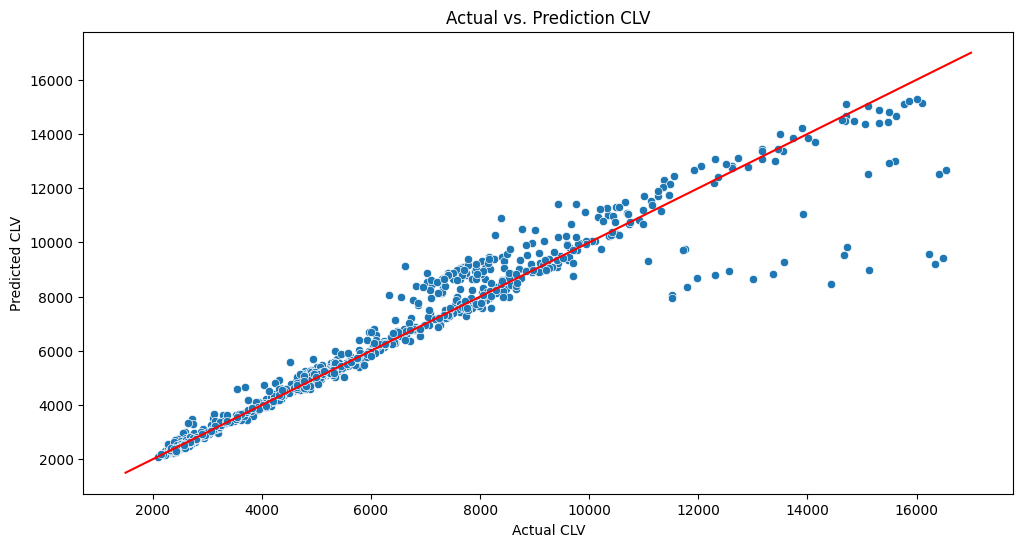

In [45]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr_tuning).set(title='Actual vs. Prediction CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV')
sns.lineplot(x=list(np.arange(1500,17000)), y=list(np.arange(1500,17000)), color='red')
plt.show();

Langkah selanjutnya menampilkan residual (selisih antara nilai aktual dan nilai prediksi) dari model Gradien Boosting Regressor yang telah memiliki parameter terbaik.

In [46]:
residual = pd.DataFrame({'y_test' : y_test,
              'y_pred': y_pred_gbr_tuning,
              'Residual' : (y_pred_gbr_tuning- y_test)
})
residual

,y_test,y_pred,Residual
5027,6763.181497,7871.403486,1108.221989
5321,9618.310865,9334.488198,-283.822667
3773,15610.900650,12995.349388,-2615.551262
4427,3099.538005,3522.061937,422.523932
614,3439.089657,3375.851331,-63.238326
...,...,...,...
4021,6409.627461,6641.761546,232.134085
106,3819.619502,3871.832281,52.212779
2607,11513.162910,7944.364491,-3568.798419
4346,10552.878370,11318.365917,765.487547


In [47]:
print(f"Banyaknya data yang diprediksi diatas nilai aktual (Overestimate): {len(residual[residual['Residual'] > 0])}")
print(f"Banyaknya data yang diprediksi dibawah nilai aktual (Underestimate) : {len(residual[residual['Residual'] < 0])}")
print(f"Prediksi Overestimate tertinggi adalah : {residual[residual['Residual'] > 0]['Residual'].max()}")
print(f"Prediksi Underestimate terendah adalah : {residual[residual['Residual'] < 0]['Residual'].min()}")

Banyaknya data yang diprediksi diatas nilai aktual (Overestimate): 484
Banyaknya data yang diprediksi dibawah nilai aktual (Underestimate) : 405
Prediksi Overestimate tertinggi adalah : 2507.4251520276493
Prediksi Underestimate terendah adalah : -7147.622261448727


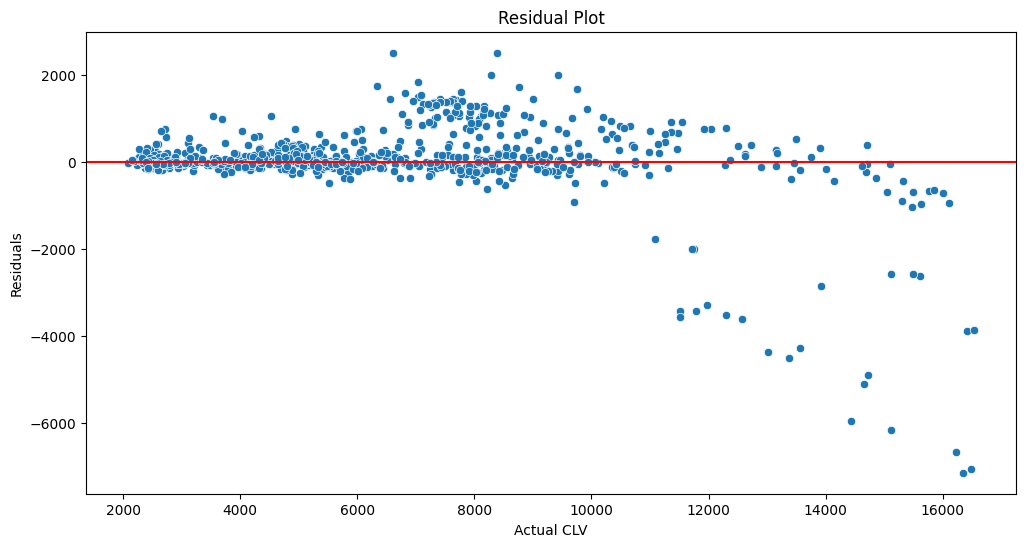

In [48]:
# Membuat scatter plot untuk memvisualisasikan residual
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr_tuning - y_test).set(title='Residual Plot', 
                                                 xlabel='Actual CLV', 
                                                 ylabel='Residuals')
plt.axhline(y=0, color='red');

Melihat fitur apa saja yang paling berpengaruh pada proses prediksi dalam model ini

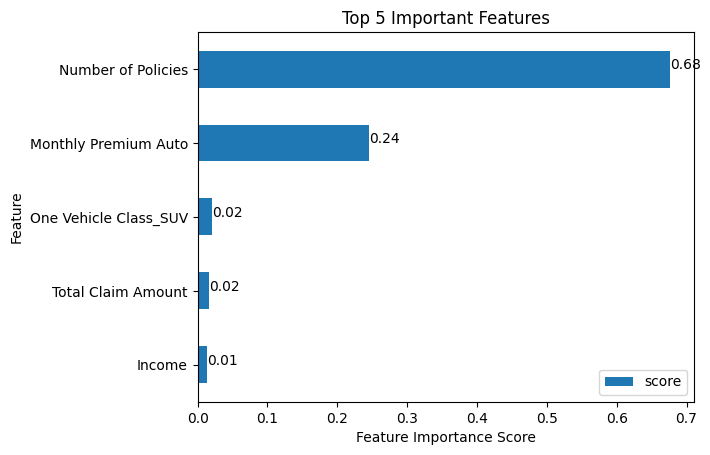

In [94]:
# Membuat dataframe feature importance
feature_imp = pd.DataFrame()
feature_imp['feature'] = gridsearch_gbr.best_estimator_.named_steps['prep'].get_feature_names_out()
feature_imp['score'] = gbr_tuning['model'].feature_importances_
feature_imp.iloc[:,0] = feature_imp.iloc[:,0].str.replace(pat=r'[A-Za-z]*__', repl='', regex=True)
feature_imp = feature_imp.set_index('feature')

# menampilkan 5 terbaik
top_features = feature_imp.sort_values('score', ascending=True).tail(5)
top_features.plot(kind='barh')
for index, value in enumerate(top_features['score']):
    plt.text(value, index, f'{value:.2f}')

plt.title('Top 5 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

Membuat SHAP (SHapley Additive exPlanations)

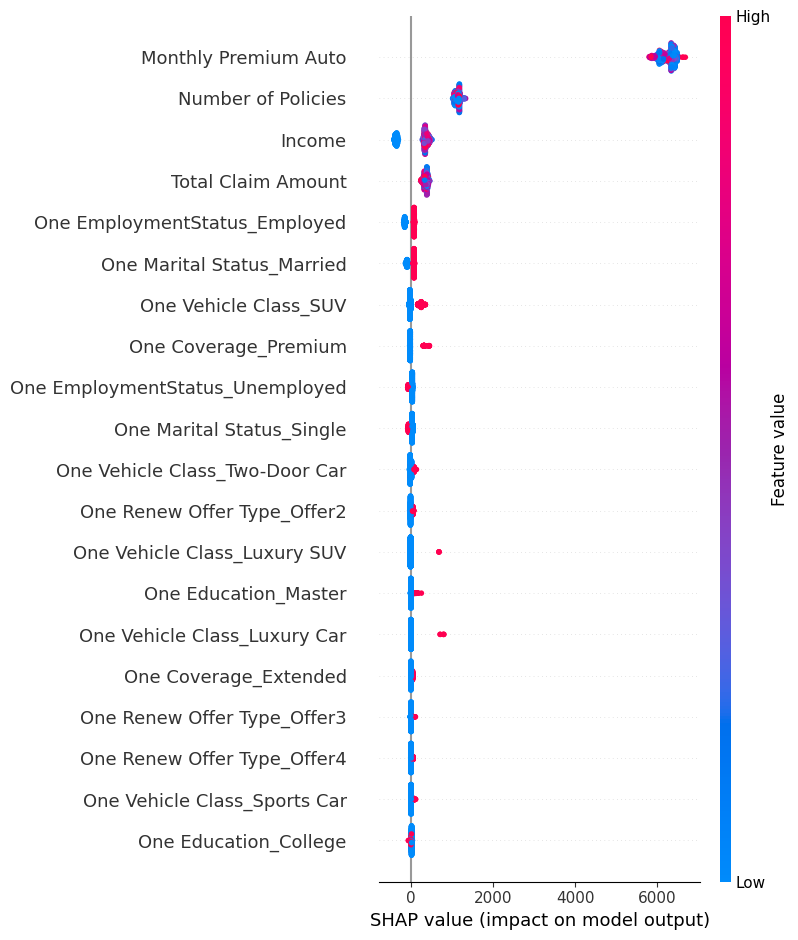

In [130]:
prep = gbr_tuning.named_steps['prep']
model = gbr_tuning.named_steps['model']
X_test_pre = prep.transform(X_test)

import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_pre)
transformerSHAPNames = pd.Series(prep.get_feature_names_out()).str.replace(pat=r'[A-Za-z]*__', repl='', regex=True)
shap.summary_plot(shap_values, X_test_pre, feature_names=transformerSHAPNames)

In [107]:
prep.get_feature_names_out()

array(['One Hot__Vehicle Class_Luxury Car',
       'One Hot__Vehicle Class_Luxury SUV', 'One Hot__Vehicle Class_SUV',
       'One Hot__Vehicle Class_Sports Car',
       'One Hot__Vehicle Class_Two-Door Car',
       'One Hot__Coverage_Extended', 'One Hot__Coverage_Premium',
       'One Hot__Renew Offer Type_Offer2',
       'One Hot__Renew Offer Type_Offer3',
       'One Hot__Renew Offer Type_Offer4',
       'One Hot__EmploymentStatus_Employed',
       'One Hot__EmploymentStatus_Medical Leave',
       'One Hot__EmploymentStatus_Retired',
       'One Hot__EmploymentStatus_Unemployed',
       'One Hot__Marital Status_Married',
       'One Hot__Marital Status_Single', 'One Hot__Education_College',
       'One Hot__Education_Doctor',
       'One Hot__Education_High School or Below',
       'One Hot__Education_Master', 'remainder__Number of Policies',
       'remainder__Monthly Premium Auto', 'remainder__Total Claim Amount',
       'remainder__Income'], dtype=object)

# Conclusion for Model

**Metrik Evaluasi** <br>
Metrik Evaluasi yang dipilih dalam model ini adalah `RMSE (Root Mean Square Error)`. RMSE dipilih karena lebih sensitif terhadap kesalahan besar. Kesalahan besar pada nilai CLV dapat berdampak terhadap pendapatan bisnis, selain itu karena mudah untuk diinterpretasikan karena memiliki satuan yang sama dengan variabel yang diukur . <br>

**Model Benchmarking**
- 2 model terbaik dari Model Benchmarking menggunakan Cross Validation yaitu :
 - `Gradient Boosting Regressor` dengan nilai RMSE: `939.441501`
 - `Random Forest Regression` dengan nilai RMSE: `998.582654`

- Maka kedua model ini dicoba untuk melakukan prediksi terhadap data test, maka hasilnya adalah model `Gradient Boosting Regressor dengan RMSE tertinggi yaitu 862.034011` maka kita ambil Gradient Boosting Regressor untuk dilakukan Hyperparameter Tuning untuk menemukan score terbaik dengan mencoba berbagai kombinasi parameter menggunakan Gridsearch. <br>

**Hyperparameter Tuning**
- Setelah melakukan Hyperparameter tuning didapati hasil parameter terbaiknya dalah :
`'Scaler': RobustScaler()`,<br>
`'model__learning_rate': 0.025`,<br>
`'model__max_depth': 4`,<br>
`'model__max_features': 0.6`,<br>
`'model__n_estimators': 300`,<br>
`'model__subsample': 0.6`
- Setelah dilakukan prediksi pada data test menggunakan best parameter, didapati RMSEnya berubah menjadi lebih baik yakni `RMSE 856.415358`. Artinya model ini memiliki rata-rata kesalahan prediksi nilai Customer Lifetime Value sekitar +-856.415358.

**Feature Importance**
- Fitur yang paling berpengaruh dalam model ini adalah: <br>
`Number of Policies dengan coeffisien 0.68` <br>
`Monthly Premium Auto dengan coeffisien 0.24`.<br>

**Limitasi**
- Limitasi dari Model ini adalah hanya bisa memprediksi akurat untuk : <br>
`nilai CLV dibawah 275.08.` <br>
`nilai Total Claim Amount dibawah 992.64.` <br>



# Conclusion for Business

- Karena fitur "Number of Policies" memiliki pengaruh paling besar pada model, Perusahaan dapat fokus pada strategi untuk meningkatkan jumlah polis asuransi yang dimiliki oleh pelanggan seperti bisa melibatkan penawaran khusus, program loyalitas, atau kampanye pemasaran yang bertujuan untuk meningkatkan jumlah polis asuransi.

- Karena fitur "Monthly Premium Auto" memiliki pengaruh yang cukup besar pada model. Perusahaan dapat mengevaluasi penetapan harga dan promosi untuk harga premi bulanan, hal ini mempunyai peluang untuk mengoptimalkan hkeuntungan perusahaan dari nilai premi bulanan.

- Melibatkan tim bisnis dalam interpretasi hasil dan pengambilan keputusan berdasarkan model untuk dapat menggabungkan pemahaman bisnis domain dengan output model, sehingga keputusan yang diambil lebih kontekstual dan dapat diimplementasikan dengan lebih baik dalam strategi bisnis.

# Recommendation

- Untuk meningkatkan akurasi prediksi CLV, perlu dilakukan analisis terhadap prediksi yang memiliki error tinggi baik itu overestimate maupun underestimate sehingga dapat mengetahui fitur-fitur apa saja yang menyebabkan error tinggi.

- Menambahkan variabel-variabel terkait dengan fitur-fitur prediksi Customer Lifetime Value (CLV) seperti `Age`,
`Years of Driving Experience`, `Number of Cars`, dan `Location`.

- Menambahkan lebih banyak lagi data agar model dapat belajar dengan baik lagi.

- Melakukan validasi model secara berkala dengan menggunakan data yang lebih baru untuk memastikan bahwa model tetap relevan dan memiliki performa yang baik terhadap data terkini.

- Melakukan segmentasi pelanggan berdasarkan nilai CLV. Hal ini dilakukan untuk memberikan penawaran yang lebih relevan dan tepat sasaran kepada pelanggan.

In [52]:
#                     _______  _                    _     __     __            _ 
#                    |__   __|| |                  | |    \ \   / /           | |
#                       | |   | |__    __ _  _ __  | | __  \ \_/ /___   _   _ | |
#                       | |   | '_ \  / _` || '_ \ | |/ /   \   // _ \ | | | || |
#                       | |   | | | || (_| || | | ||   <     | || (_) || |_| ||_|
#                       |_|   |_| |_| \__,_||_| |_||_|\_\    |_| \___/  \__,_|(_)      
                                      

___

### Save Model

In [53]:
# import pickle

# model_ada_fix = gridsearch_gbr.best_estimator_
# model_ada_fix.fit(Feature, Target)

# # save with pickle
# pickle.dump(model_ada_fix, open('Best_Model_GBR.sav', 'wb'))

In [54]:
# # Load model
# filename = 'Best_Model_GBR.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [55]:
# # Predict with loaded model
# np.sqrt(mean_squared_error(Target, loaded_model.predict(Feature)))